In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, TimeDistributed, Flatten, Conv1D, MaxPooling1D
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

from forecaster import Forecaster
import matplotlib.pyplot as plt
plt.style.use('default')

2023-09-08 12:24:21.640180: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-08 12:24:21.640222: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-09-08 12:24:22.599164: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-08 12:24:22.599269: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-09-08 12:24:22.599280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [2]:
df = pd.read_csv('META.csv', parse_dates = ['Date'])

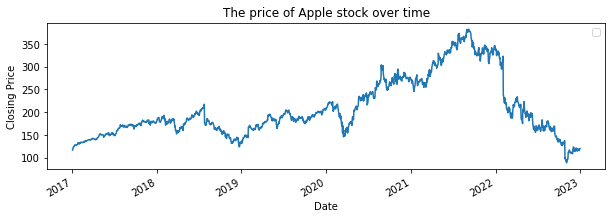

In [3]:
ax = df.plot(x='Date', y='Close', figsize = (10, 3))
ax.set_ylabel('Closing Price')
ax.set_title('The price of Apple stock over time')
ax.legend([])

In [4]:
df = df[['Date', 'Close']]

In [5]:
forecaster = Forecaster(
    df,
    x = 'Date',
    y = 'Close'
)

,Training score,Test score
Ridge,3.370227,0.533621


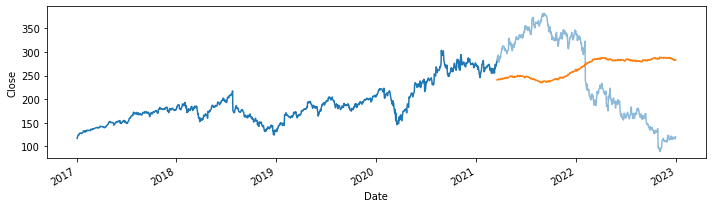

In [6]:
pred, score = forecaster.validate(Ridge(), seasonality = True, plot = True)

,Training score,Test score
XGBRegressor,0.646037,0.462888


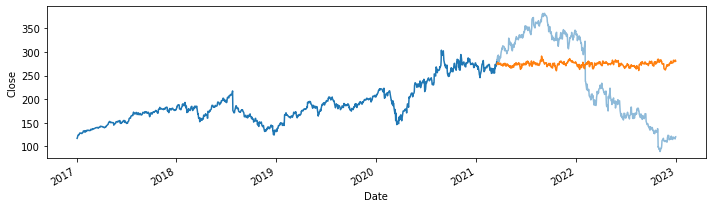

In [7]:
pred, score = forecaster.validate(XGBRegressor(), seasonality = True, plot = True)

2023-09-08 12:24:36.194246: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-09-08 12:24:36.194291: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-09-08 12:24:36.194326: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (seshdesktop): /proc/driver/nvidia/version does not exist


,Training score,Test score
GRU,0.978864,0.578585


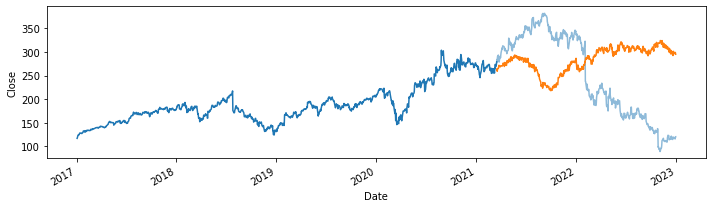

In [8]:
model = Sequential([
    GRU(units = 60),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.88758,0.589685


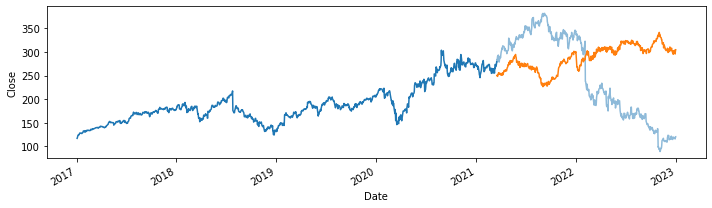

In [9]:
model = Sequential([
    LSTM(units = 60),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.783314,0.597837


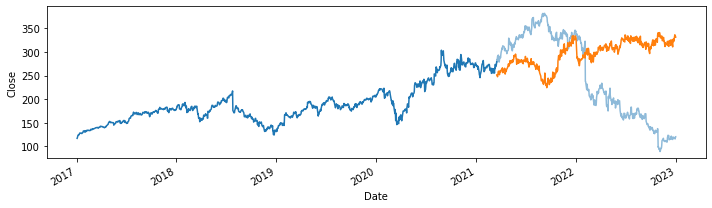

In [12]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
GRU,0.824732,0.591523


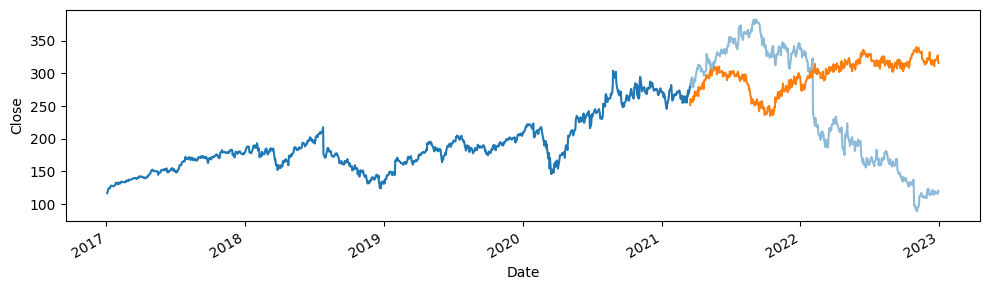

In [45]:
model = Sequential([
    GRU(units = 60, return_sequences = True),
    Dropout(0.1),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
LSTM,0.776773,0.621095


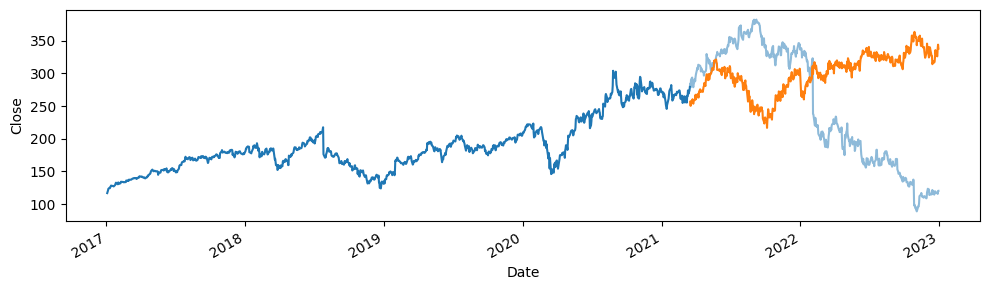

In [46]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM_GRU')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 60).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
Conv1D,0.776098,0.550269


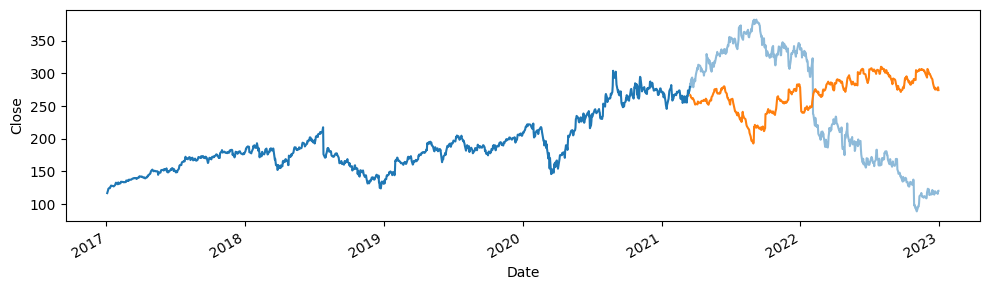

In [48]:
model = Sequential([
    Conv1D(filters = 128, kernel_size = 11, activation = 'relu'),
    MaxPooling1D(pool_size = 2),
    Flatten(),
    Dense(units = 1)
], name = 'CNN')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 7).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

,Training score,Test score
Conv1D,0.83822,0.4708


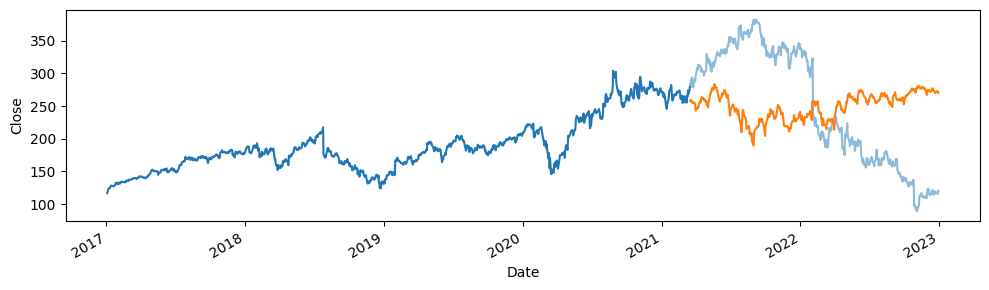

In [49]:
model = Sequential([
    Conv1D(filters = 128, kernel_size = 11, activation = 'relu'),
    MaxPooling1D(pool_size = 2),
    GRU(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'CNN')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    #lag = np.arange(1, 7).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.755451,0.497478


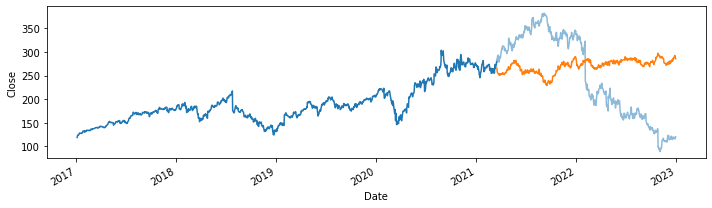

In [13]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 2).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.730719,0.459276


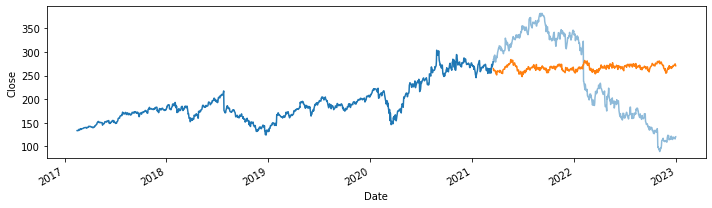

In [14]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 31).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.729795,0.471756


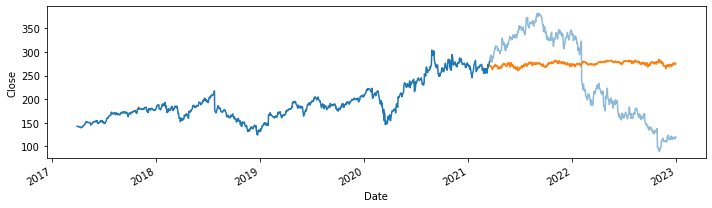

In [15]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 61).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)

  0%|          | 0/453 [00:00<?, ?it/s]

,Training score,Test score
LSTM,0.707609,0.455525


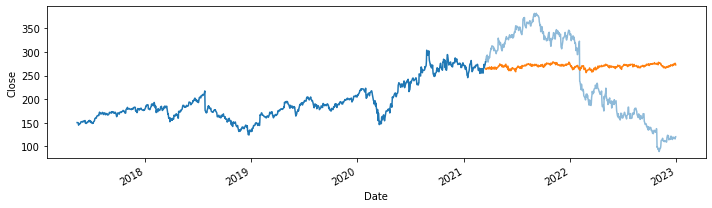

In [16]:
model = Sequential([
    LSTM(units = 60, return_sequences = True),
    Dropout(0.1),
    LSTM(units = 30),
    Dropout(0.1),
    Dense(units = 1)
], name = 'LSTM')

model.compile(optimizer = Adam(), loss = MeanSquaredError())
fit_kwargs = {'epochs': 30, 'batch_size': 32, 'verbose': 0}

pred, score = forecaster.validate(
    model, 
    seasonality = True, 
    lag = np.arange(1, 91).tolist(),
    plot = True, 
    fit_kwargs = fit_kwargs
)